<a href="https://colab.research.google.com/github/nmuraro/entregables/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [1]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


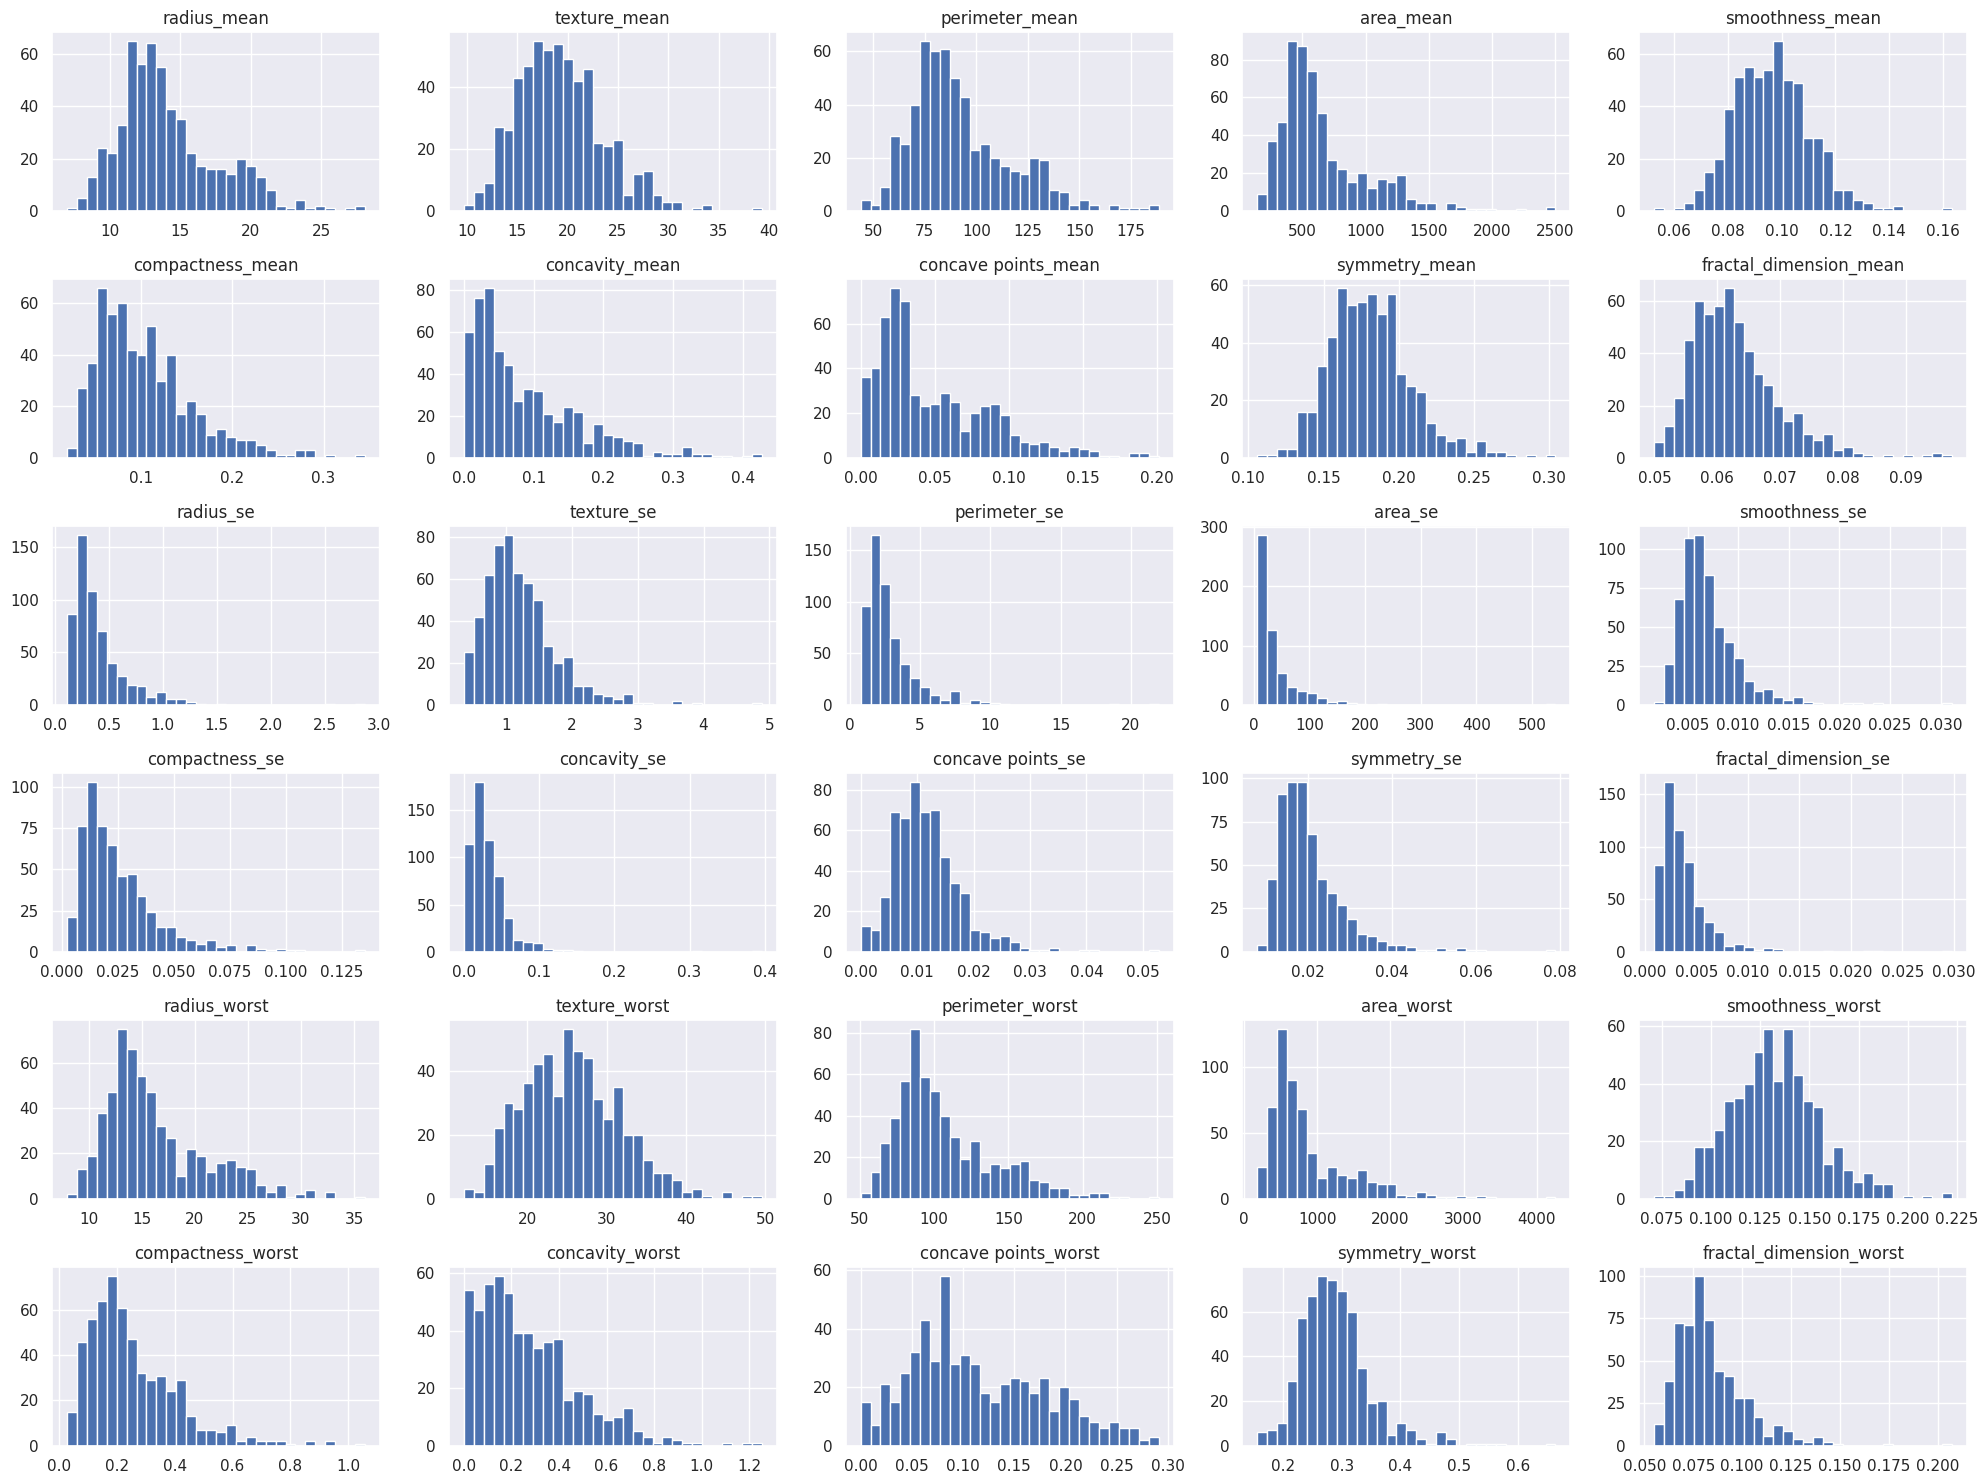

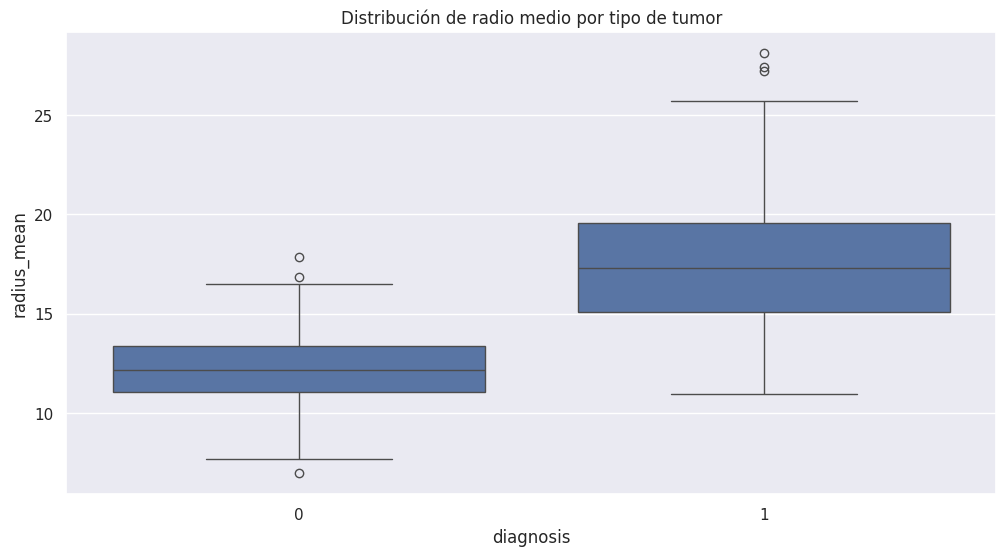

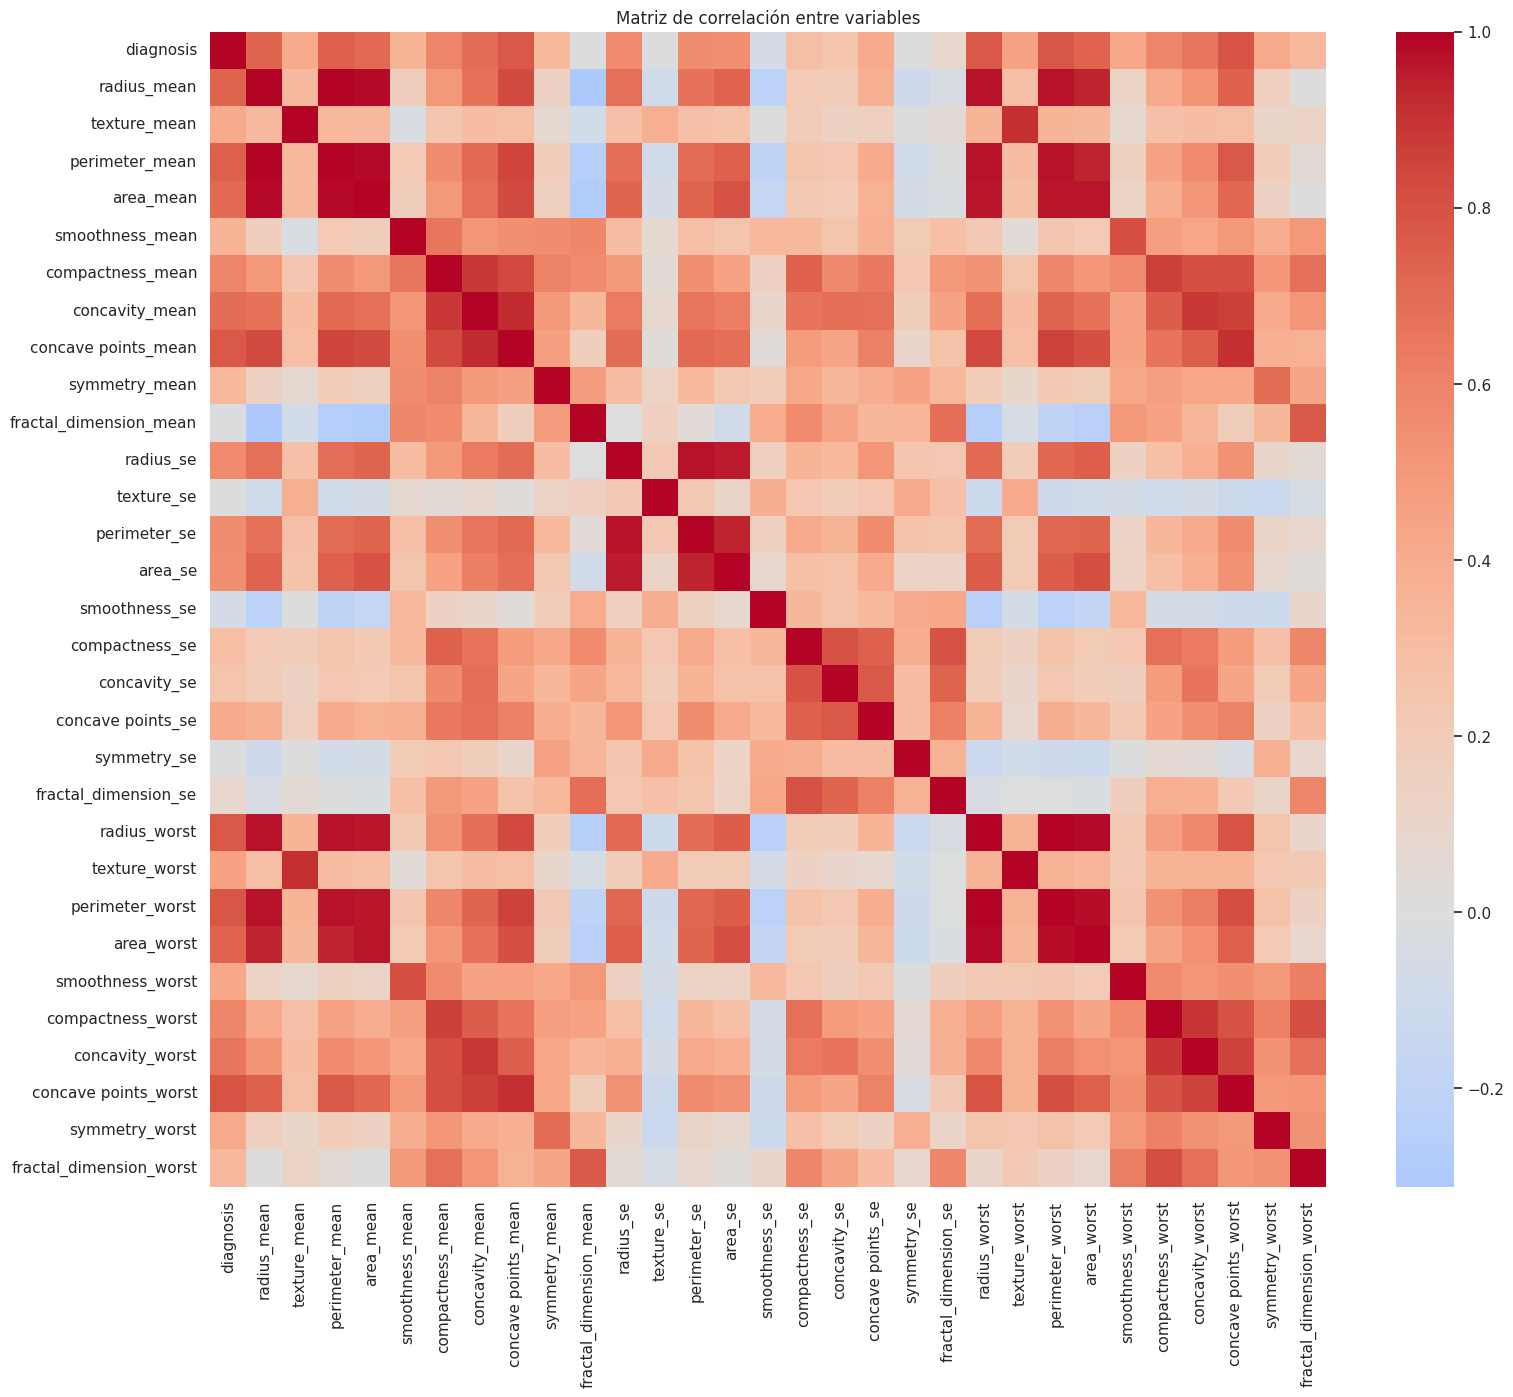

In [2]:
# Distribuciones y outliers
df.drop(columns='diagnosis').hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

# Boxplots por tipo de tumor
plt.figure(figsize=(12, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title('Distribución de radio medio por tipo de tumor')
plt.show()

# Correlación
plt.figure(figsize=(18, 15))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Matriz de correlación entre variables')
plt.show()


**Pregunta 1:** El análisis inicial mediante histogramas permitió visualizar la forma de las distribuciones de cada una de las 30 variables numéricas del conjunto de datos. En general, se observó:

Distribuciones sesgadas a la derecha (asimetría positiva) en variables como area_mean, radius_mean, concavity_mean, lo cual es esperable dado que estas características describen propiedades físicas no negativas y altamente variables en tumores malignos.

Presencia de valores atípicos (outliers) especialmente notorios en variables como perimeter_worst, area_worst, concavity_worst, lo que podría reflejar la variabilidad estructural en casos más agresivos de cáncer.

Variables como smoothness_mean o symmetry_mean presentan distribuciones más concentradas, lo que sugiere menor capacidad de discriminación individual.

Luego, el uso de boxplots para variables seleccionadas (como radius_mean, area_mean, concavity_mean) según la variable diagnosis (0 = benigno, 1 = maligno) reveló diferencias muy marcadas:

Los tumores malignos presentan consistentemente valores más altos en variables como:

radius_mean, area_mean: tamaño general del núcleo.

concavity_mean, concave_points_mean: describe irregularidades y forma dentada del contorno.

perimeter_worst y radius_worst: medidas en la peor zona del tumor.

Esto sugiere que los tumores malignos tienden a ser más grandes, irregulares y menos compactos, lo que es coherente con la descripción médica de tumores invasivos.

La matriz de correlación permitió identificar:

Alta multicolinealidad entre grupos de variables:

radius_mean, perimeter_mean y area_mean presentan correlaciones superiores a 0.9 → estas variables esencialmente capturan el mismo fenómeno físico (tamaño).

concavity_mean, concave_points_mean, compactness_mean también están altamente correlacionadas, indicando redundancia.

Este análisis sugiere que existe redundancia en el dataset, y que una reducción de dimensionalidad o selección de características puede ser beneficiosa para reducir el ruido y mejorar la interpretación de los modelos.


2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


In [4]:
# Separar X e y
X = df.drop(columns='diagnosis')
y = df['diagnosis']

# Escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Para ello, se aplicó el método StandardScaler(), que transforma cada variable x mediante la fórmula:

𝑥_scaled=(𝑥−𝜇)/𝜎

donde 𝜇 es la media y 𝜎 la desviación estándar de la variable.

Esta transformación garantiza que:

Cada variable tenga media cero y desviación estándar uno.

Se evite que las variables con valores más grandes (como area_mean o perimeter_worst) dominen el aprendizaje del modelo por sobre las más pequeñas (como fractal_dimension_mean).

Conclusión: Esta normalización fue indispensable para aplicar técnicas de reducción de dimensionalidad como PCA y para mejorar el desempeño y estabilidad de los modelos clasificadores.

Durante el EDA, se identificaron bloques de variables altamente correlacionadas, por ejemplo:

radius_mean, perimeter_mean, area_mean (𝑟>0.9)

concavity_mean, concave_points_mean, compactness_mean

Estas correlaciones sugieren una redundancia de información, lo cual puede afectar negativamente:

La interpretabilidad del modelo (coeficientes poco estables).

La eficiencia del aprendizaje, especialmente en modelos lineales o PCA.

Selección de Variables con Menor Redundancia

Se aplicó una selección conservadora donde, de cada grupo altamente correlacionado, se retuvo solo una variable representativa. Por ejemplo:

Grupo Correlado	Variable Seleccionada
radio/perímetro/área	radius_mean
concavidad/compactación	concavity_mean
puntos cóncavos	concave_points_mean

Esta selección mantuvo las variables más representativas desde el punto de vista clínico y matemático, logrando reducir el número de dimensiones sin pérdida significativa de información.

Justificación de Elecciones

Se escogió StandardScaler por ser el método estándar y robusto para normalización en datasets numéricos sin outliers extremos.

La reducción de multicolinealidad permite modelos más simples, rápidos y con menor riesgo de sobreajuste.


3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


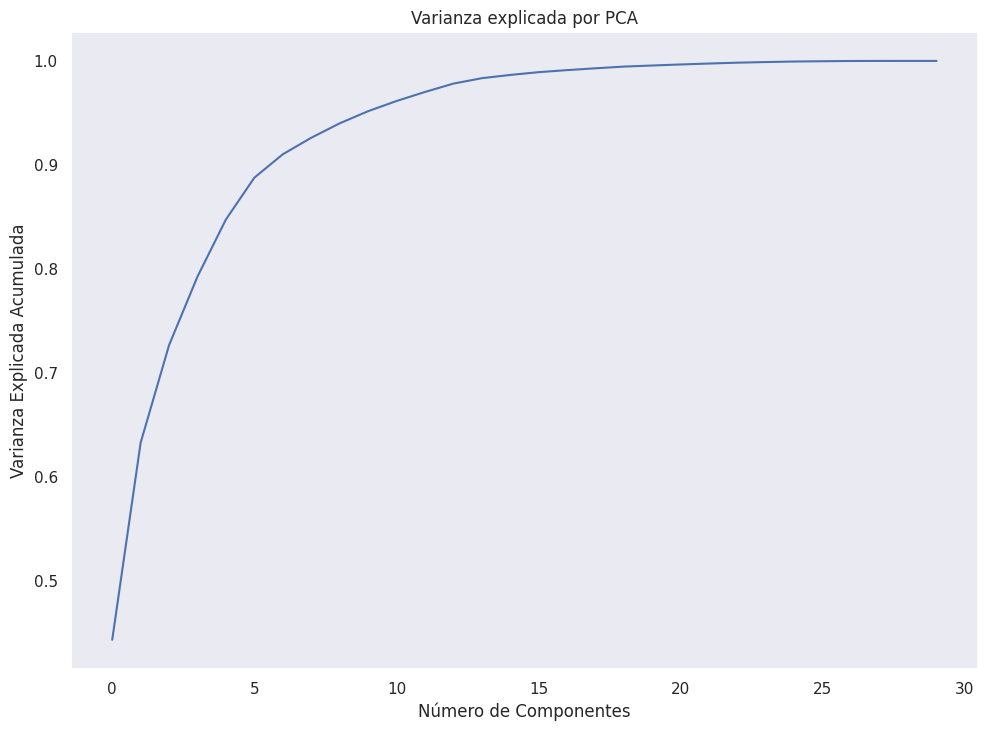

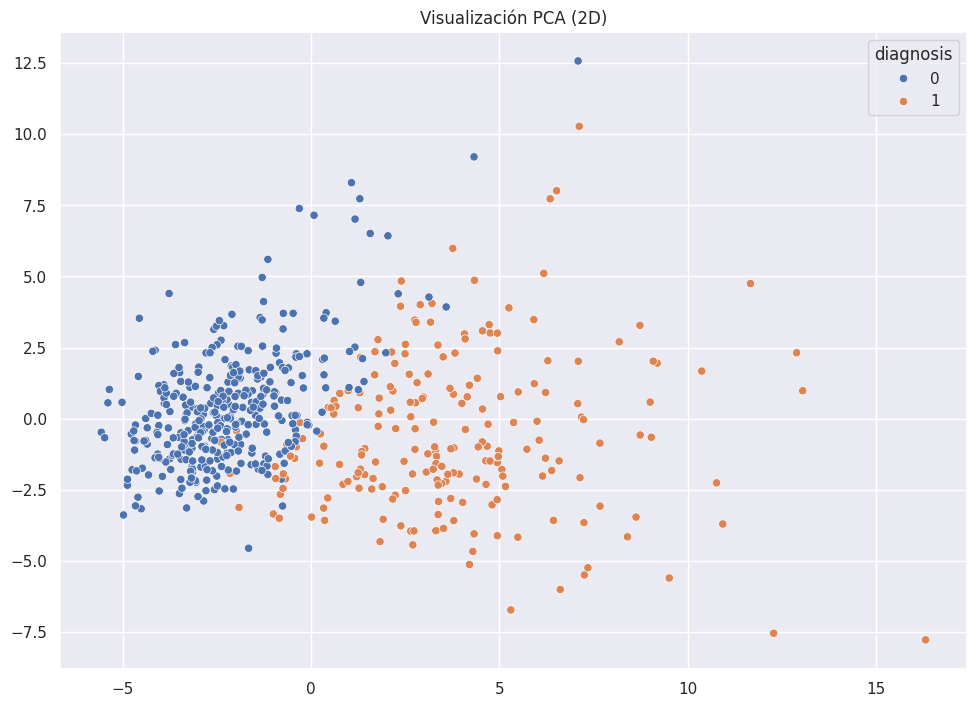

In [5]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Varianza explicada por PCA")
plt.grid()
plt.show()

# Visualización 2D
X_pca_2d = PCA(n_components=2).fit_transform(X_scaled)
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette="deep")
plt.title("Visualización PCA (2D)")
plt.show()


El gráfico de varianza acumulada mostró que:

Las primeras 6 componentes explican aproximadamente el 90% de la varianza.

Para capturar el 95% de la información, son necesarias alrededor de 10 componentes principales.

Interpretación:
Es posible reducir de 30 a 10 dimensiones sin perder información significativa

Luego, al proyectar los datos en las primeras dos componentes principales,se observan agrupaciones claras entre tumores benignos (y=0) y malignos (y=1).

Aunque no hay una separación perfecta, las clases tienden a ubicarse en regiones distintas del plano.

Esto sugiere que PCA logra capturar estructura discriminativa incluso en sólo dos dimensiones, aunque no necesariamente capte relaciones no lineales


4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Diccionario de modelos
modelos = {
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'RandomForest': RandomForestClassifier()
}

# Hiperparámetros básicos a probar
parametros = {
    'LogisticRegression': {'C': [0.01, 0.1, 1, 10]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'RandomForest': {'n_estimators': [50, 100, 200]}
}

# Búsqueda de hiperparámetros
best_models = {}

for nombre, modelo in modelos.items():
    grid = GridSearchCV(modelo, parametros[nombre], cv=5, scoring='f1')
    grid.fit(X_train, y_train)
    best_models[nombre] = grid.best_estimator_

    print(f"Mejor modelo para {nombre}:")
    print(grid.best_params_)
    print()
from sklearn.metrics import confusion_matrix, classification_report

for nombre, modelo in best_models.items():
    y_pred = modelo.predict(X_test)
    print(f"Resultados para {nombre}:")
    print(classification_report(y_test, y_pred))
    print("Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)


Mejor modelo para LogisticRegression:
{'C': 1}

Mejor modelo para SVC:
{'C': 1, 'kernel': 'linear'}

Mejor modelo para RandomForest:
{'n_estimators': 200}

Resultados para LogisticRegression:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Matriz de Confusión:
[[106   2]
 [  1  62]]
--------------------------------------------------
Resultados para SVC:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Matriz de Confusión:
[[106   2]
 [  2 

se presenta como el modelo con mejor compromiso entre precisión y generalización, mostrando un balance ideal en tareas clínicas donde minimizar los falsos negativos es prioritario (evitar que un tumor maligno sea clasificado como benigno).

Sin embargo, tanto SVM como Random Forest también ofrecen rendimientos sobresalientes y pueden ser preferibles dependiendo del caso clínico, la interpretabilidad requerida o la presencia de ruido en los datos


5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



Tras entrenar y evaluar distintos modelos de clasificación supervisada —Regresión Logística, SVM y Random Forest— el modelo que mostró el mejor rendimiento general fue la Regresión Logística. Esto se refleja tanto en las métricas cuantitativas como en el análisis cualitativo:

Presentó un F1-score de 0.98 para la clase maligna, la más crítica desde el punto de vista médico.

Tuvo la menor cantidad de falsos negativos, lo cual es fundamental en el contexto clínico, donde una mala clasificación puede tener consecuencias severas para la salud del paciente.

Además, la Regresión Logística ofrece interpretabilidad, permitiendo a profesionales de la salud entender qué características influyen más en la clasificación, lo cual favorece la transparencia y confianza en el modelo.